<a href="https://colab.research.google.com/github/habibur122/AI/blob/main/Tugas_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"⚽️Welcome To My Most Expensive Players Analysis⚽️"




Importing Libaries📚



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/SEMESTER 5/Project AI/players.csv")

In [ ]:
df.rename(columns={"Unnamed: 0":"Point","Markey Value In Millions(£)":"Market_Value"},inplace=True)

In [ ]:
df.head()

,Point,Name,Position,Age,Market_Value,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


Filtring🔍

In [ ]:
teams=df.groupby(["Club","Name"])
teams.first()

Point            Position  Age  \
Club                    Name                                                  
AC Milan                Alessio Romagnoli      439         Centre-Back   26   
                        Alexis Saelemaekers    476        Right Winger   22   
                        Ante Rebic             199         Left Winger   28   
                        Brahim Díaz            342  Attacking Midfield   22   
                        Davide Calabria        307          Right-Back   24   
...                                            ...                 ...  ...   
Wolverhampton Wanderers Rúben Neves            117  Defensive Midfield   24   
Zenit St. Petersburg    Malcom                 362        Right Winger   24   
                        Sardar Azmoun          317      Centre-Forward   26   
                        Wendel                 468    Central Midfield   24   
                        Wilmar Barrios         491  Defensive Midfield   28   

                                             Market_Value   Country  Matches  \
Club                    Name                                                   
AC Milan                Alessio Romagnoli            18.0     Italy       11   
                        Alexis Saelemaekers          16.2   Belgium       16   
                        Ante Rebic                   28.8   Croatia       11   
                        Brahim Díaz                  20.7     Spain       11   
                        Davide Calabria              22.5     Italy       14   
...                                                   ...       ...      ...   
Wolverhampton Wanderers Rúben Neves                  37.8  Portugal       13   
Zenit St. Petersburg    Malcom                       19.8    Brazil       15   
                        Sardar Azmoun                22.5      Iran       18   
                        Wendel                       16.2    Brazil       20   
                        Wilmar Barrios               16.2  Colombia       16   

                                             Goals  Own Goals  Assists  \
Club                    Name                                             
AC Milan                Alessio Romagnoli        0          0        0   
                        Alexis Saelemaekers      0          0        2   
                        Ante Rebic               2          0        2   
                        Brahim Díaz              4          0        2   
                        Davide Calabria          2          0        1   
...                                            ...        ...      ...   
Wolverhampton Wanderers Rúben Neves              1          0        0   
Zenit St. Petersburg    Malcom                   3          0        5   
                        Sardar Azmoun            9          0        4   
                        Wendel                   4          0        2   
                        Wilmar Barrios           0          0        1   

                                             Yellow Cards  \
Club                    Name                                
AC Milan                Alessio Romagnoli               1   
                        Alexis Saelemaekers             2   
                        Ante Rebic                      1   
                        Brahim Díaz                     3   
                        Davide Calabria                 2   
...                                                   ...   
Wolverhampton Wanderers Rúben Neves                     4   
Zenit St. Petersburg    Malcom                          1   
                        Sardar Azmoun                   1   
                        Wendel                          3   
                        Wilmar Barrios                  2   

                                             Second Yellow Cards  Red Cards  \
Club                    Name                                                  
AC Milan                Alessio Romagnoli                    

In [ ]:
columns_show=["Matches","Goals","Assists"]
df.groupby(["Club"])[columns_show].agg([np.mean,np.std,np.min,np.max]).head(10)

<ipython-input-7-ca6b2f967557>:2: FutureWarning: The provided callable <function mean at 0x7e46285f95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["Club"])[columns_show].agg([np.mean,np.std,np.min,np.max]).head(10)
<ipython-input-7-ca6b2f967557>:2: FutureWarning: The provided callable <function std at 0x7e46285f96c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(["Club"])[columns_show].agg([np.mean,np.std,np.min,np.max]).head(10)
<ipython-input-7-ca6b2f967557>:2: FutureWarning: The provided callable <function min at 0x7e46285f8dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupb

Matches                       Goals                    \
                      mean       std min max      mean       std min max   
Club                                                                       
AC Milan         13.153846  3.782551   6  20  1.461538  1.613246   0   5   
ACF Fiorentina   11.000000  2.828427   9  15  3.400000  4.979960   0  12   
AS Monaco        19.500000  2.777460  16  24  3.625000  2.973094   0   8   
AS Roma          13.555556  6.247222   0  18  2.666667  2.645751   0   8   
Ajax Amsterdam   15.833333  1.169045  14  17  4.333333  5.006662   0  14   
Al-Rayyan SC      3.000000       NaN   3   3  1.000000       NaN   1   1   
Arsenal FC        9.533333  2.614975   5  15  1.533333  2.199567   0   7   
Aston Villa       9.090909  2.071451   5  12  0.909091  1.044466   0   3   
Atalanta BC      12.500000  2.907670   8  16  1.666667  2.188122   0   8   
Athletic Bilbao   9.000000  4.082483   3  12  1.250000  1.500000   0   3   

                  Assists                    
                     mean       std min max  
Club                                         
AC Milan         1.615385  1.980676   0   7  
ACF Fiorentina   1.200000  1.303840   0   3  
AS Monaco        2.125000  2.232071   0   6  
AS Roma          1.222222  1.301708   0   3  
Ajax Amsterdam   3.166667  2.041241   1   6  
Al-Rayyan SC     1.000000       NaN   1   1  
Arsenal FC       0.800000  1.014185   0   3  
Aston Villa      0.909091  0.831209   0   2  
Atalanta BC      1.166667  1.850471   0   5  
Athletic Bilbao  0.250000  0.500000   0   1

Add Column

In [ ]:
df["G\A"]=(
df["Goals"]
+df["Assists"])
def best_players(df):
    print(df[df["G\A"] > 16])
best_players(df)

     Point                Name            Position  Age  Market_Value  \
0        0       Kylian Mbappé      Centre-Forward   22         144.0   
1        1      Erling Haaland      Centre-Forward   21         135.0   
4        4       Mohamed Salah        Right Winger   29          90.0   
58      58          Leroy Sané         Left Winger   25          54.0   
63      63  Robert Lewandowski      Centre-Forward   33          54.0   
96      96  Christopher Nkunku  Attacking Midfield   24          42.3   
238    238       Thomas Müller      Second Striker   32          27.0   
263    263    Sébastien Haller      Centre-Forward   27          24.3   
333    333       Karim Benzema      Centre-Forward   33          22.5   
387    387      Julián Álvarez      Centre-Forward   21          18.0   
394    394       Karim Adeyemi      Centre-Forward   19          18.0   

           Country                       Club  Matches  Goals  Own Goals  \
0           France        Paris Saint-Germain  

In [ ]:
df["Position"].value_counts()

,count
Position,
Centre-Back,87
Central Midfield,74
Centre-Forward,70
Right Winger,48
Left Winger,46
Attacking Midfield,41
Defensive Midfield,41
Right-Back,30
Left-Back,23


In the data, there are football players who are mostly in the defender position

In [ ]:
df["Age"].unique()

array([22, 21, 28, 26, 29, 30, 24, 27, 18, 34, 23, 25, 20, 19, 33, 36, 31,
       32, 17, 16])

In [ ]:
def data_inv(df):
    print(df.describe())
    print("-"*70)
    print("Top 5 player",df["Name"][:5])
    print("-"*40)
    print("Means of goals:", df["Goals"].mean())
    print("Dataset variables:",df.shape[0])
    print("All assists:",df["Assists"].sum())
    print("-"*40)
    print(df.dtypes)
    print("-"*73)
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=np.number)
    print("Correlation of data",numeric_df.corr()) # Calculate correlation for numeric columns only
    print("-"*81)
data_inv(df)

            Point         Age  Market_Value     Matches       Goals  \
count  500.000000  500.000000    500.000000  500.000000  500.000000   
mean   249.500000   24.968000     31.537800   12.396000    2.160000   
std    144.481833    3.165916     17.577697    4.342453    2.880102   
min      0.000000   16.000000     16.200000    0.000000    0.000000   
25%    124.750000   23.000000     19.800000   10.000000    0.000000   
50%    249.500000   25.000000     25.200000   13.000000    1.000000   
75%    374.250000   27.000000     36.000000   16.000000    3.000000   
max    499.000000   36.000000    144.000000   24.000000   23.000000   

        Own Goals    Assists  Yellow Cards  Second Yellow Cards   Red Cards  \
count  500.000000  500.00000    500.000000           500.000000  500.000000   
mean     0.030000    1.51200      1.592000             0.036000    0.046000   
std      0.170758    1.85276      1.445585             0.186477    0.209695   
min      0.000000    0.00000      0.000000  

Missing Values🧹

In [ ]:
df.isnull().sum()

,0
Point,0
Name,0
Position,0
Age,0
Market_Value,0
Country,0
Club,0
Matches,0
Goals,0
Own Goals,0


Graphics📊

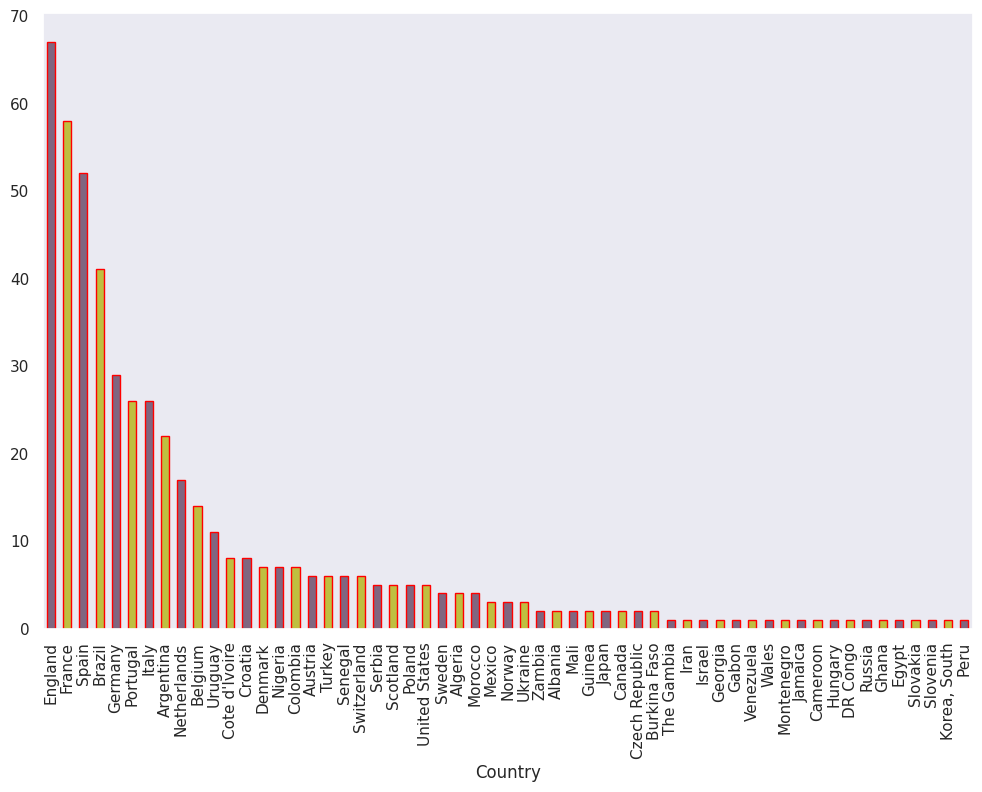

In [ ]:
my_colors = ['g', 'b']*5
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5


plt.figure(figsize=(12,8))
df["Country"].value_counts().plot(kind="bar",color=my_colors,edgecolor="red")
plt.grid()
plt.show()

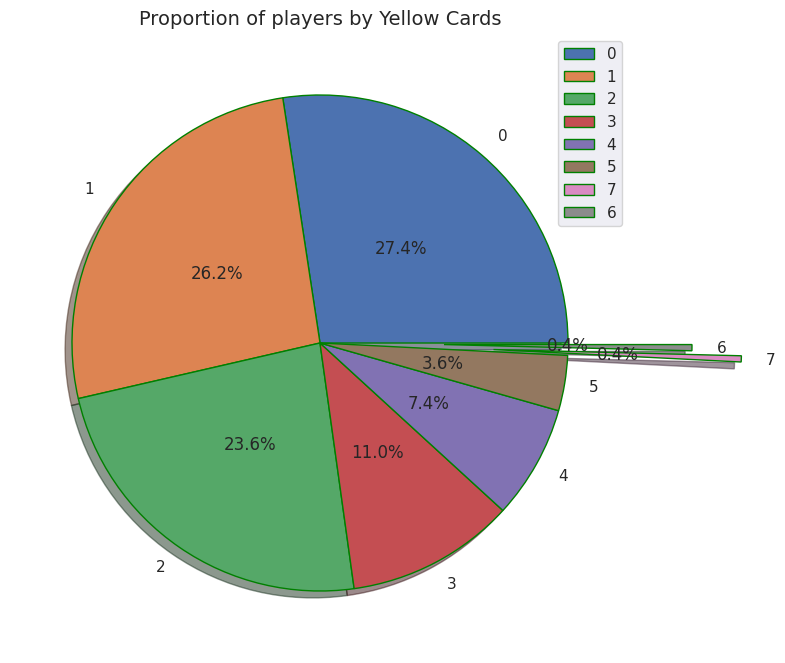

In [ ]:
explode=(0,0,0,0,0,0,0.7,0.5)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
pie, ax = plt.subplots(figsize=[8,10])
labels = df["Yellow Cards"].value_counts().keys()
plt.pie(x=df["Yellow Cards"].value_counts(), autopct="%.1f%%", labels=labels, pctdistance=0.5,explode=explode,shadow=True,
       wedgeprops = wp)
plt.legend()
plt.title("Proportion of players by Yellow Cards", fontsize=14);

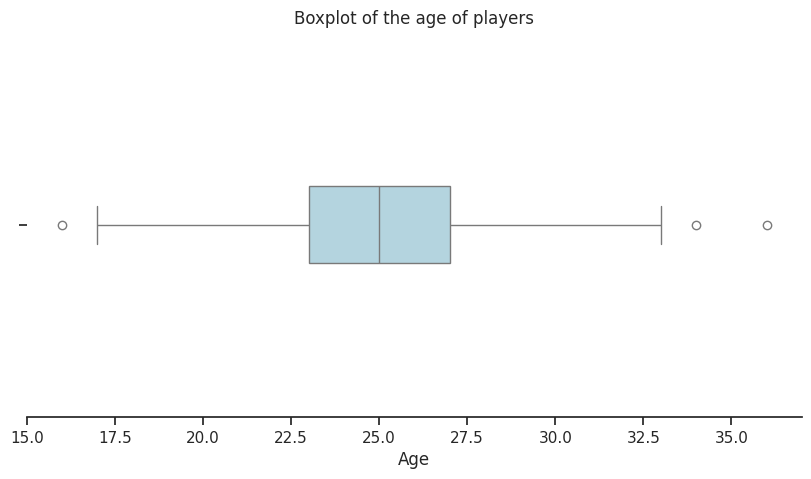

In [ ]:
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Age", color="lightblue", width=0.2);
plt.title("Boxplot of the age of players")
sns.despine(left=True);

Benzema 🆚 Lewandowski

In [ ]:
df[df["Name"] == "Karim Benzema"],df[df["Name"] == "Robert Lewandowski"]

(     Point           Name        Position  Age  Market_Value Country  \
 333    333  Karim Benzema  Centre-Forward   33          22.5  France   
 
             Club  Matches  Goals  Own Goals  Assists  Yellow Cards  \
 333  Real Madrid       15     14          0        8             0   
 
      Second Yellow Cards  Red Cards  Number Of Substitute In  \
 333                    0          0                        0   
 
      Number Of Substitute Out  G\A  
 333                         4   22  ,
     Point                Name        Position  Age  Market_Value Country  \
 63     63  Robert Lewandowski  Centre-Forward   33          54.0  Poland   
 
              Club  Matches  Goals  Own Goals  Assists  Yellow Cards  \
 63  Bayern Munich       17     23          0        2             0   
 
     Second Yellow Cards  Red Cards  Number Of Substitute In  \
 63                    0          0                        0   
 
     Number Of Substitute Out  G\A  
 63                         5 

In [ ]:
import plotly.graph_objects as go
df_sorted = df.sort_values(by='G\A', ascending=False)
labels=np.array([
    "Goals",
    "Assists",
    "G\A",
    "Matches",
    "Market_Value"
])
stats=df_sorted.loc[63,labels].values
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='R.Lewandowski'
))
stats=df_sorted.loc[333, labels].values
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='K.Benzema'
))
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.show()

Nkunku 🆚 Wirtz

In [ ]:
df[df["Name"] == "Florian Wirtz"],df[df["Name"] == "Christopher Nkunku"]

(    Point           Name            Position  Age  Market_Value  Country  \
 42     42  Florian Wirtz  Attacking Midfield   18          58.5  Germany   
 
                    Club  Matches  Goals  Own Goals  Assists  Yellow Cards  \
 42  Bayer 04 Leverkusen       14      7          0        7             2   
 
     Second Yellow Cards  Red Cards  Number Of Substitute In  \
 42                    0          0                        4   
 
     Number Of Substitute Out  G\A  
 42                         8   14  ,
     Point                Name            Position  Age  Market_Value Country  \
 96     96  Christopher Nkunku  Attacking Midfield   24          42.3  France   
 
           Club  Matches  Goals  Own Goals  Assists  Yellow Cards  \
 96  RB Leipzig       17     11          0        7             0   
 
     Second Yellow Cards  Red Cards  Number Of Substitute In  \
 96                    0          0                        1   
 
     Number Of Substitute Out  G\A  
 96       

In [ ]:
wirts_nkunku=df[df["Name"] == "Florian Wirtz"],df[df["Name"] == "Christopher Nkunku"]
df_sorted = df.sort_values(by='G\A', ascending=False)
labels=np.array([
    "Goals",
    "Assists",
    "G\A",
    "Matches",
    "Market_Value"
])
stats=df_sorted.loc[42,labels].values
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='F.Wirtz'
))
stats=df_sorted.loc[96, labels].values
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='C.Nkunku'
))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.show()

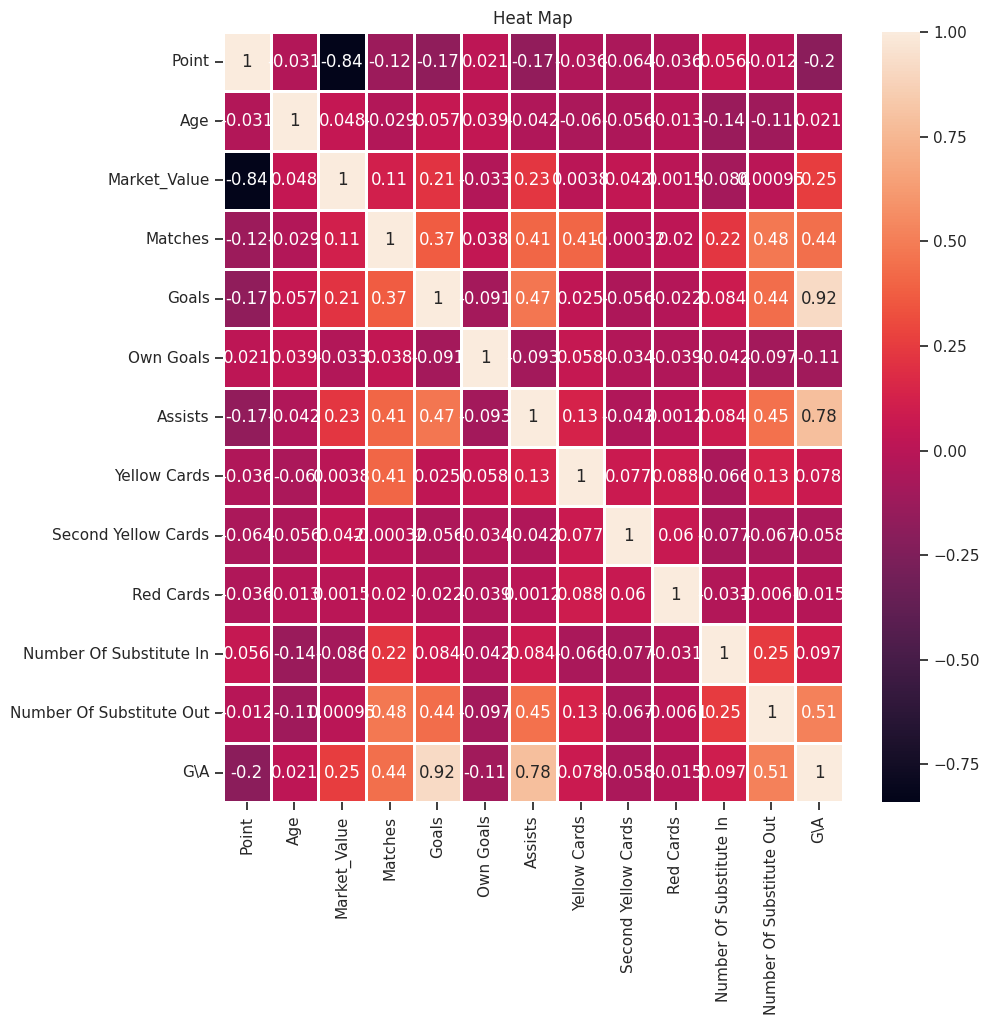

In [ ]:
plt.figure(figsize=(10,10))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
heat_map = sns.heatmap(numeric_df.corr(), linewidth = 1 , annot = True) # Calculate correlation for numeric columns only
plt.title( "Heat Map" )
plt.show()

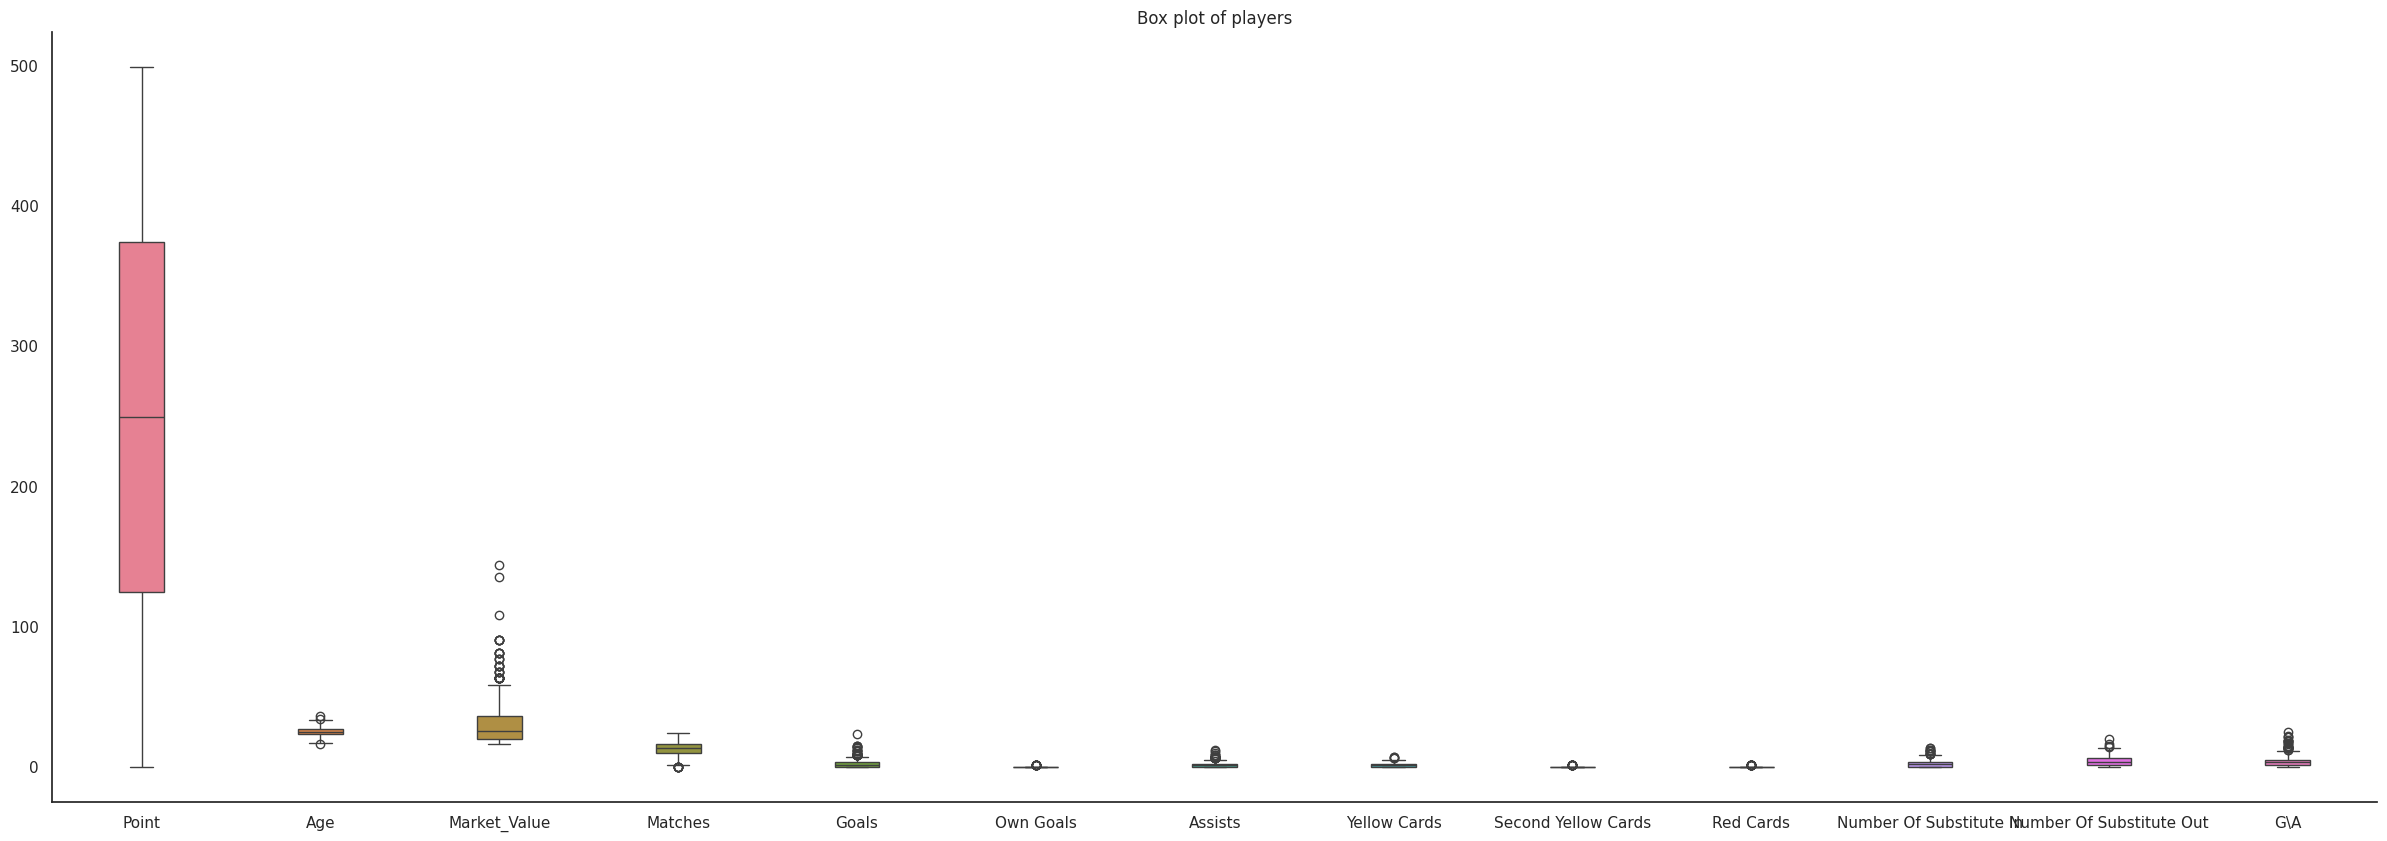

In [ ]:
df.drop(["Name","Position","Country","Club"],axis=1,inplace=False)

plt.figure(figsize=(30, 10))
sns.set_style("white")
plot = sns.boxplot(data=df, width=0.25)
plt.title("Box plot of players")
sns.despine()
plt.show()

In [ ]:
def matches(df):
    y=df.loc[471,"Matches"]
    o=df.loc[113,"Matches"]
    r=df.loc[0,"Market_Value"]
    a=df.loc[63,"Goals"]
    d=df.loc[238,"Assists"]
    print("Youngest Player Matches:",y)
    print("Oldest Player Matches:",o)
    print("Most Expensive Player:",r)
    print("Most Goals Scored:",a)
    print("Most Assisted:",d)
matches(df)

Youngest Player Matches: 11
Oldest Player Matches: 14
Most Expensive Player: 144.0
Most Goals Scored: 23
Most Assisted: 12


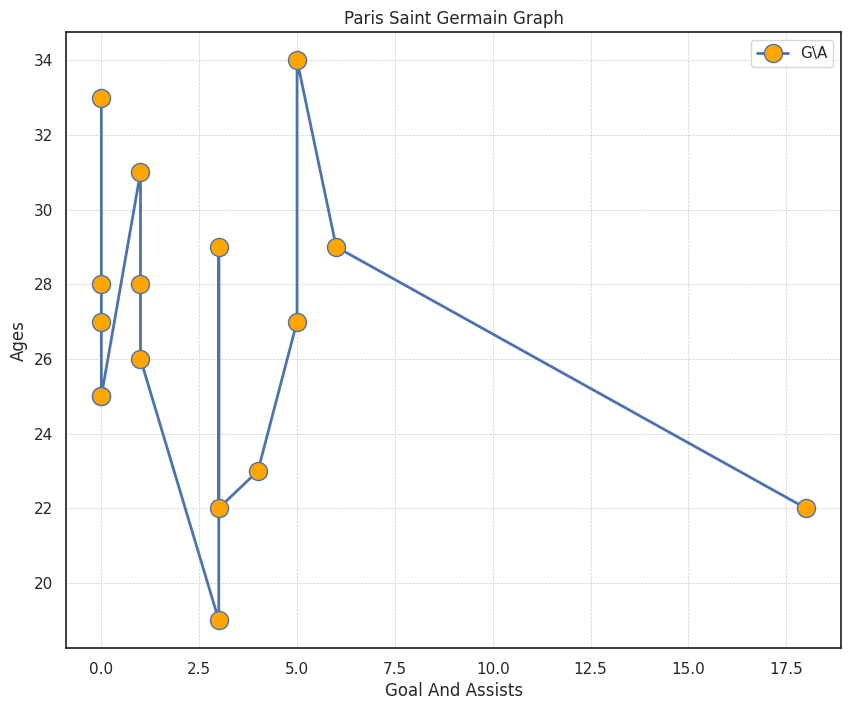

In [ ]:
ages=[22,29,34,27,23,22,29,19,26,28,31,25,25,27,28,33]
g_and_a=[18,6,5,5,4,3,3,3,1,1,1,0,0,0,0,0]

plt.figure(figsize=(10,8))
plt.plot(g_and_a,ages,linewidth="2",label="G\A",marker="o",markersize=13,markerfacecolor="orange")
plt.grid(linestyle="--",linewidth=0.5)
plt.xlabel("Goal And Assists")
plt.ylabel("Ages")
plt.title("Paris Saint Germain Graph")
plt.legend()
plt.show()

<Axes: >

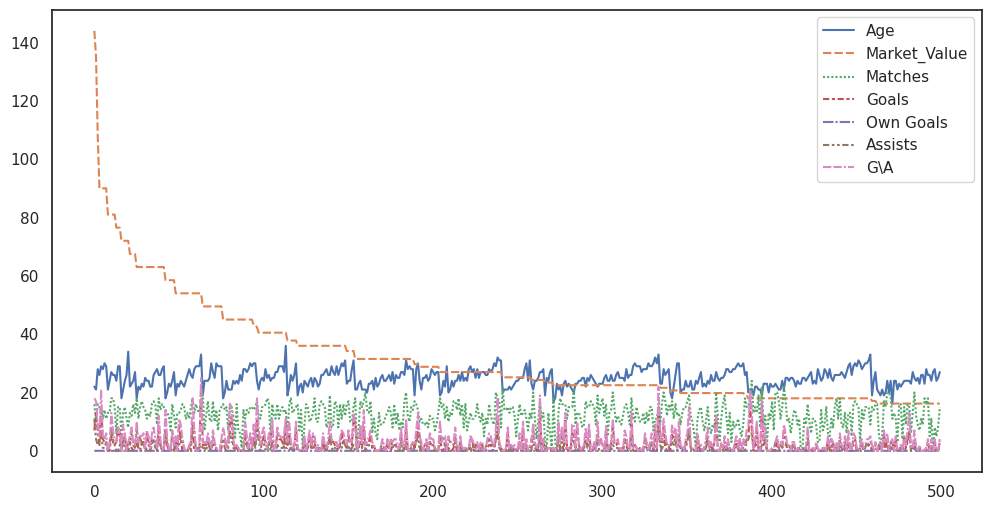

In [ ]:
df=df.drop(["Point","Number Of Substitute In","Number Of Substitute Out","Red Cards",
            "Yellow Cards","Second Yellow Cards"],axis=1,inplace=False)
plt.figure(figsize=(12,6))
sns.lineplot(data=df)

Calculate Accuracy💾

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=df.drop(["Name","Position","Club"],axis=1,inplace=False)
X=df.drop(columns=["Country"])
Y=df["Country"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

score=accuracy_score(Y_test,predictions)
score

0.05

Decision Tree🌲

In [ ]:
from sklearn import tree
X1=df.drop(columns=["Country"])
Y2=df["Country"]

model=DecisionTreeClassifier()
model.fit(X1,Y2)

tree.export_graphviz(model,out_file="Football.dot",feature_names=["Age","Market_Value","Matches","Goals","Own Goals","Assists","G\A"],class_names=sorted(Y2.unique()),
                    label="all",
                    rounded=True,
                    filled=True)

K-Means📈

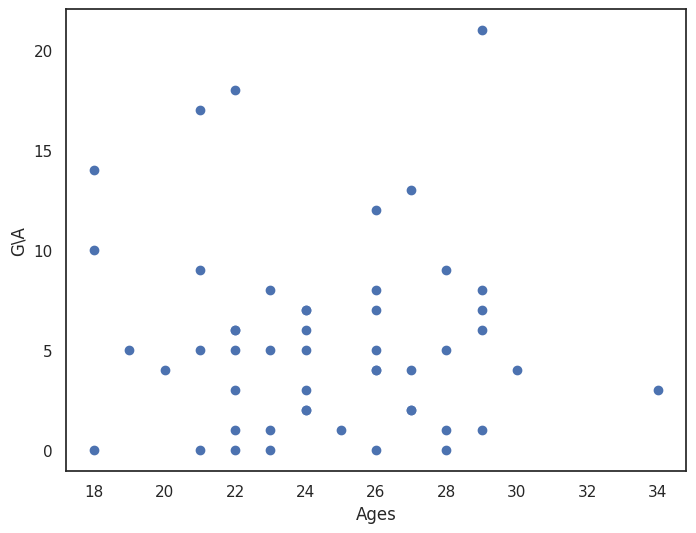

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["Age"][:50] ,df["G\A"][:50])
plt.xlabel("Ages")
plt.ylabel("G\A")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
df=df.drop(["Country"],axis=1,inplace=False)
t=df.copy()
kmeans=KMeans(2)
kmeans.fit(t)

KMeans(n_clusters=2)

In [ ]:
clusters=t.copy()
clusters["cluster_pred"]=kmeans.fit_predict(t)

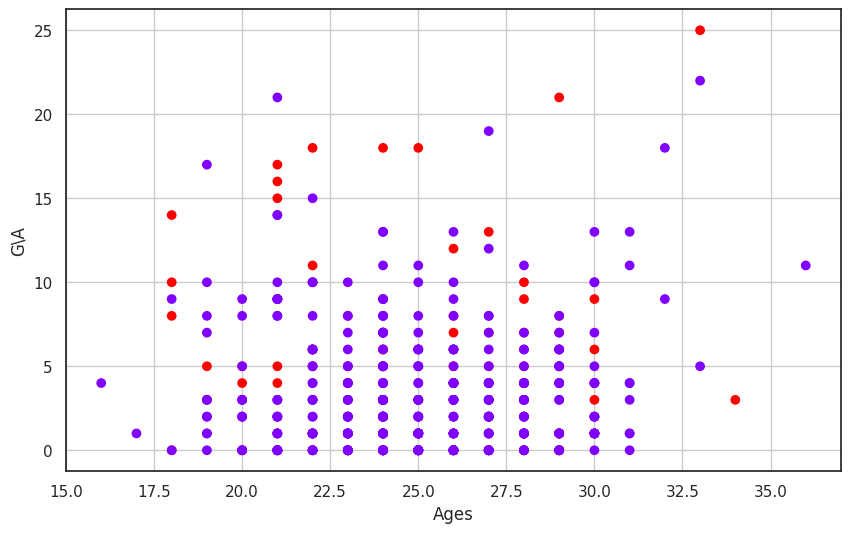

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(clusters["Age"],clusters["G\A"],c=clusters["cluster_pred"],cmap="rainbow")
plt.xlabel("Ages")
plt.ylabel("G\A")
plt.grid()
plt.show()

In [ ]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(t)
x_scaled

array([[-0.93842438,  6.4044131 ,  0.83077685, ..., -0.17586311,
         5.126136  ,  3.50272665],
       [-1.2546051 ,  5.89188785, -0.55231447, ..., -0.17586311,
         1.34420598,  3.2582594 ],
       [ 0.95865995,  4.35431208,  0.83077685, ..., -0.17586311,
         0.26365455,  1.30252147],
       ...,
       [-0.30606294, -0.87344554, -1.70489057, ..., -0.17586311,
        -0.81689688, -0.89768371],
       [ 0.01011778, -0.87344554, -1.01334491, ..., -0.17586311,
        -0.81689688, -0.89768371],
       [ 0.64247923, -0.87344554,  0.60026163, ..., -0.17586311,
        -0.27662117,  0.08018526]])

In [ ]:
wcss=[]

for i in range(1,50):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[3499.9999999999973,
 2983.848070410542,
 2065.22847809143,
 2112.7801918046007,
 1604.594195773281,
 1443.2827972037846,
 1346.1709257793204,
 1185.3362032680907,
 1158.5089383860263,
 1094.4086471402466,
 1034.9622988051492,
 997.5264568390304,
 972.2366130745258,
 901.8949116572392,
 909.1066938430223,
 843.6630704533535,
 819.6116862640816,
 787.2265039505041,
 777.5282616213397,
 729.3029090583291,
 715.3788096896312,
 703.4256739232566,
 708.8472969061513,
 674.3953644249312,
 645.3837094803501,
 622.2778923359598,
 631.4678729210177,
 608.9765026483636,
 587.8330828925873,
 593.8474975245142,
 580.478001889217,
 575.4013460188089,
 532.7865859410981,
 548.4647955570023,
 509.71101324081434,
 516.0806187591445,
 512.0967132891693,
 496.9472950988518,
 479.63343041897514,
 486.1923575040052,
 482.7122109214999,
 476.43548112268786,
 453.4987794741955,
 465.3018323388584,
 450.48747198917516,
 448.57467054303885,
 436.3705899315766,
 429.8868771755088,
 420.618825832022]

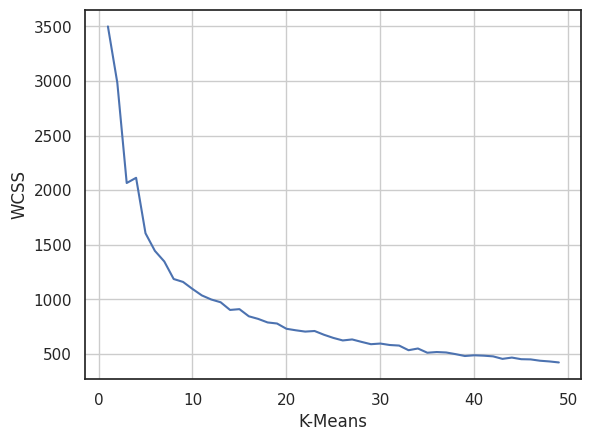

In [ ]:
plt.plot(range(1,50),wcss)
plt.xlabel("K-Means")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [ ]:
kmeans_new=KMeans(8)
kmeans.fit(x_scaled)
cluster_new=t.copy()
cluster_new["cluster_pred"]=kmeans_new.fit_predict(x_scaled)
cluster_new


,Age,Market_Value,Matches,Goals,Own Goals,Assists,G\A,cluster_pred
0,22,144.0,16,7,0,11,18,7
1,21,135.0,10,13,0,4,17,7
2,28,108.0,16,7,0,2,9,4
3,26,90.0,15,2,0,3,5,4
4,29,90.0,15,15,0,6,21,7
...,...,...,...,...,...,...,...,...
495,27,16.2,0,0,0,0,0,5
496,28,16.2,8,1,0,3,4,1
497,24,16.2,5,0,0,0,0,5
498,25,16.2,8,0,0,0,0,5


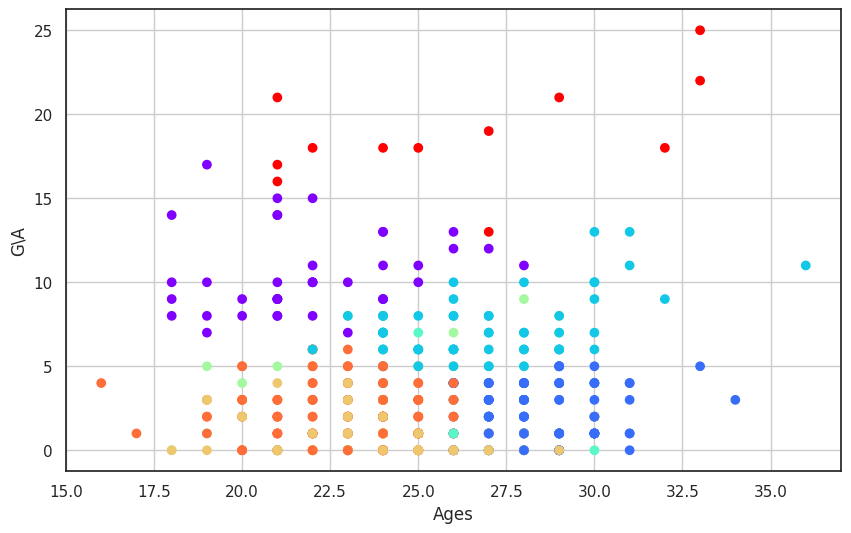

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(cluster_new["Age"],cluster_new["G\A"],c=cluster_new["cluster_pred"],cmap="rainbow")
plt.xlabel("Ages")
plt.ylabel("G\A")
plt.grid()
plt.show()

In [ ]:
df.describe()

,Age,Market_Value,Matches,Goals,Own Goals,Assists,G\A
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,24.968000,31.537800,12.396000,2.160000,0.030000,1.51200,3.672000
std,3.165916,17.577697,4.342453,2.880102,0.170758,1.85276,4.094624
min,16.000000,16.200000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,23.000000,19.800000,10.000000,0.000000,0.000000,0.00000,1.000000
50%,25.000000,25.200000,13.000000,1.000000,0.000000,1.00000,3.000000
75%,27.000000,36.000000,16.000000,3.000000,0.000000,2.00000,5.000000
max,36.000000,144.000000,24.000000,23.000000,1.000000,12.00000,25.000000


Linear Regression📉

In [ ]:
r1=df["Matches"][:50]
r2=df["Goals"][:50]

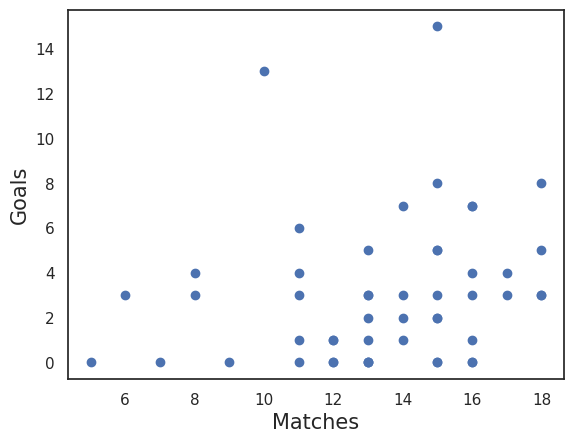

In [ ]:
plt.scatter(r1,r2)
plt.xlabel("Matches",fontsize=15)
plt.ylabel("Goals",fontsize=15)
plt.show()

In [ ]:
import statsmodels.api as sm
R=sm.add_constant(r2)
results=sm.OLS(r1,R).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Matches   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.975
Date:                Wed, 25 Dec 2024   Prob (F-statistic):              0.166
Time:                        05:27:43   Log-Likelihood:                -126.26
No. Observations:                  50   AIC:                             256.5
Df Residuals:                      48   BIC:                             260.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7918      0.605     21.158      0.000      11.576      14.007
Goals          0.1910      0.136      1.406      0.166      -0.082       0.464
==============================================================================
Omnibus:                        5.567   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.997
Skew:                          -0.773   Prob(JB):                       0.0822
Kurtosis:                       3.096   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

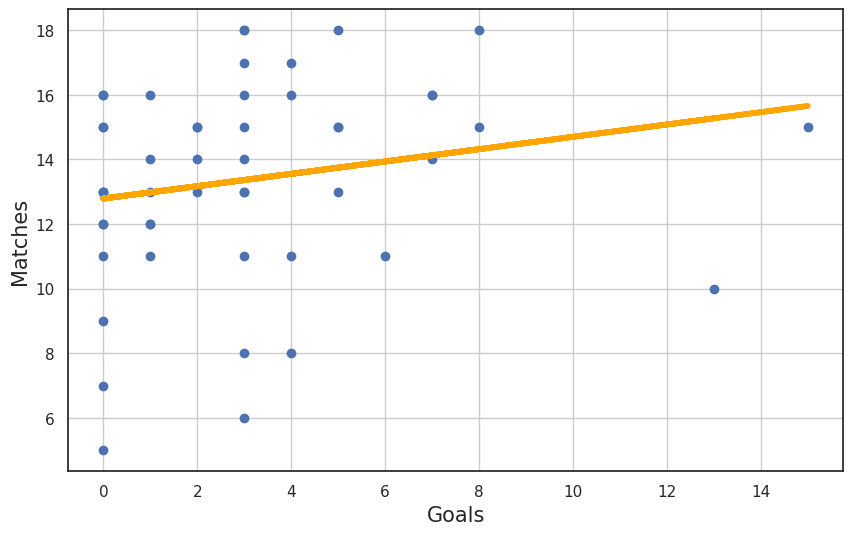

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(r2,r1)
yhat= 0.1910*r2 + 12.7918
fig=plt.plot(r2,yhat,lw=4,c="orange",label="Regression Line")
plt.xlabel("Goals",fontsize=15)
plt.ylabel("Matches",fontsize=15)
plt.grid()
plt.show()

In [ ]:
df.head()

,Age,Market_Value,Matches,Goals,Own Goals,Assists,G\A
0,22,144.0,16,7,0,11,18
1,21,135.0,10,13,0,4,17
2,28,108.0,16,7,0,2,9
3,26,90.0,15,2,0,3,5
4,29,90.0,15,15,0,6,21
